<a href="https://colab.research.google.com/github/SmirnygaTotoshka/FBB_Courses/blob/main/ML_in_Bio_Sem_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Семинар 5. 


Сначала решим оставшиеся с семинара 4 задания.

# Предсказание растворимости веществ

Загрузим недавно опубликованный датасет [AqSolDB](https://www.nature.com/articles/s41597-019-0151-1), объединяющий информацию о растворимости химических веществ из разных источников. 



In [ ]:
!wget  https://kodomo.fbb.msu.ru/FBB/year_20/ml/curated-solubility-dataset.csv

--2021-10-14 14:42:16--  https://kodomo.fbb.msu.ru/FBB/year_20/ml/curated-solubility-dataset.csv
Resolving kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)... 93.180.63.127
Connecting to kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)|93.180.63.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3750208 (3.6M) [text/csv]
Saving to: ‘curated-solubility-dataset.csv.1’

curated-solubility- 100%[===================>]   3.58M  2.56MB/s    in 1.4s    

2021-10-14 14:42:18 (2.56 MB/s) - ‘curated-solubility-dataset.csv.1’ saved [3750208/3750208]



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("curated-solubility-dataset.csv")

In [ ]:
data.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,3.9581,102.4454,23.0,0.0,0.0,2.0,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,2.4055,51.9012,13.0,1.0,1.0,2.0,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,2.1525,36.8395,9.0,1.0,0.0,2.0,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,8.1161,200.7106,53.0,6.0,2.0,7.0,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,2.4854,119.0760,31.0,6.0,0.0,6.0,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


В качестве Y используйте колонку **Solubility**

In [ ]:
y = data.Solubility
y.shape

(9982,)

В качестве X - все колонки после Solubility

In [ ]:
X = data.drop(['ID', 'Name', 'InChI', 'InChIKey', 'SMILES', 'Solubility', 'SD',
       'Ocurrences', 'Group'], axis=1, inplace = False)
X.shape

(9982, 17)

Разбейте ваши данные на обучение и тест в отношении 8:2

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

Попробуйте на данной задаче и на основе только посчитанных авторами признаков (начинаются с MolWt), предсказать растворимость веществ при помощи:

1. Линейной регрессии

2. KNN-регрессии

3. SVM (понадобится SVR из пакета)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

Так как у второго и третьего алгоритма есть гиперпараметры, то сначала на трейне используйте GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
# пример из мануала для SVC- адаптируйте к вашей задаче
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)

Для SVR можете использовать дефолтные гиперпараметры.
Для KNN подберите число соседей

Выберите лучший на кросс-валидации алгоритм

Проверьте финальную модель на тесте

## "Парадокс"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score

Создадим таблицу 200 на 10000 со "здоровыми" и "больными" пациентами и данными об "экспрессии" их генов. 


In [ ]:
gene_count = 10000
genes = [f"Gene{ind}" for ind in range(gene_count)]
healthy = pd.DataFrame(np.random.normal(size=(100, gene_count), 
                                        loc=0, 
                                        scale=1), 
                       columns=genes)
healthy['State'] = "H"
diseased = pd.DataFrame(np.random.normal(size=(100, gene_count), 
                                         loc=0, 
                                         scale=1),
                        columns=genes)
diseased['State'] = "D"
patients = pd.concat([healthy, diseased], axis=0)

In [ ]:
patients

,Gene0,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,Gene10,Gene11,Gene12,Gene13,Gene14,Gene15,Gene16,Gene17,Gene18,Gene19,Gene20,Gene21,Gene22,Gene23,Gene24,Gene25,Gene26,Gene27,Gene28,Gene29,Gene30,Gene31,Gene32,Gene33,Gene34,Gene35,Gene36,Gene37,Gene38,Gene39,...,Gene9961,Gene9962,Gene9963,Gene9964,Gene9965,Gene9966,Gene9967,Gene9968,Gene9969,Gene9970,Gene9971,Gene9972,Gene9973,Gene9974,Gene9975,Gene9976,Gene9977,Gene9978,Gene9979,Gene9980,Gene9981,Gene9982,Gene9983,Gene9984,Gene9985,Gene9986,Gene9987,Gene9988,Gene9989,Gene9990,Gene9991,Gene9992,Gene9993,Gene9994,Gene9995,Gene9996,Gene9997,Gene9998,Gene9999,State
0,0.925935,1.348882,2.035669,-0.481802,0.372642,-0.053925,-0.553449,-0.967005,0.146853,-0.060078,-1.611104,1.861278,0.658900,1.866762,1.474707,-1.852339,0.504873,-0.689925,-0.416532,1.181125,1.073866,-0.466686,0.135211,-0.747930,0.507493,0.339452,-0.598062,0.949097,0.589064,0.472312,-0.188801,1.178531,-0.281534,0.658672,1.711054,-0.351295,0.981155,-0.305473,0.567425,-0.037383,...,0.951612,-1.562606,-0.480564,0.140714,2.282218,-1.877665,0.186216,-0.752812,-0.383213,-1.580592,0.324258,0.213816,0.943554,-0.359136,0.112553,-1.419229,-1.390714,-0.603284,-0.438650,0.898299,-1.013337,-1.433521,0.421935,0.634119,0.869291,0.899079,-0.352819,1.482706,1.347993,0.384940,-0.497290,0.862167,-0.501739,-0.218418,-0.326961,-1.617842,0.353011,0.169626,-0.249892,H
1,0.035420,-0.140496,-1.572537,-0.033216,0.440870,-1.325369,-0.513308,0.565055,-0.465706,0.515569,1.234491,-2.582604,0.301934,-0.364335,0.584631,0.794063,0.497070,1.041345,2.043526,0.654754,0.256194,1.201056,1.012750,-0.213274,0.913264,-0.233955,-0.278203,0.126462,-0.786853,-1.302439,0.341610,0.792018,0.235464,0.409370,-3.531176,-0.146273,0.242147,1.378921,-0.411350,-2.092940,...,0.650756,-0.064152,-1.094815,-3.009165,0.762865,-0.723923,0.407599,-1.690471,-1.778126,-0.882834,0.486239,0.753798,-0.420475,1.291947,-0.513930,-0.953795,1.613514,-1.920056,-0.352175,-0.801742,-0.939994,1.549361,-0.026871,1.716224,1.251633,1.316942,-1.308953,1.227277,1.308198,0.954040,-0.231379,-0.327168,-0.930706,0.243767,1.354129,0.063578,0.553380,-0.261631,0.030496,H
2,-0.453866,-1.059780,0.866036,-0.912853,-0.489056,0.930322,-0.136927,-1.455584,-0.533088,-1.073200,-0.220498,-0.561451,-1.933264,0.008723,-0.849133,1.093845,-2.035705,-1.105540,-0.095039,-0.416932,-0.370996,0.127155,-1.582038,0.657588,-0.392914,-0.930249,1.181683,0.433585,-0.100499,-0.714011,0.706805,1.470041,1.355907,0.360089,-2.184152,0.913930,-1.487661,-0.459644,1.310503,0.589778,...,1.138484,0.485054,0.377498,0.907963,-1.518452,-0.356145,0.647248,-0.317344,-1.311270,-0.199463,1.684126,0.962251,0.506276,1.339552,0.249477,-0.802524,-0.375109,-0.036089,-0.371494,1.452477,-0.576713,-0.282003,0.346782,-0.877804,0.221842,0.192599,-1.588798,0.926194,1.021185,1.716748,-0.394020,-0.053979,0.133349,0.565096,-0.699138,0.999954,0.023737,-1.856454,-1.465021,H
3,0.896050,0.282893,1.564149,-0.343068,0.137741,0.164333,0.371658,0.004097,-1.073643,-0.024660,-1.507331,0.596423,0.104185,0.139318,-1.147271,-1.355551,-0.790863,-0.139517,0.552921,0.542803,-1.016234,0.246645,1.057321,0.429911,-0.640627,1.292829,1.483767,0.121714,-1.630521,-1.217768,0.044483,-0.677303,-1.514660,-0.151612,-0.749446,-1.433399,-0.544032,0.957136,-0.424226,0.764158,...,-0.074299,1.067733,-1.132774,1.511315,-1.042945,0.457995,-1.423509,-1.020821,-0.845672,1.544997,-0.573029,1.607165,-0.871827,0.994319,0.132044,-0.845848,-1.615347,1.103632,-1.447584,-1.158399,-0.077905,-0.623106,0.337395,-0.036959,-1.491630,0.266395,0.949298,0.157026,-0.124045,1.042012,0.809018,0.626930,0.123365,1.287190,-0.312695,1.761380,1.876644,0.380175,1.479545,H
4,1.589964,1.199870,-0.078596,1.218579,1.449019,0.702450,-0.169428,-0.097430,-0.710789,-1.228032,-1.640979,-0.571107,0.028870,-0.345304,-0.527111,0.430578,-0.078557,-0.274710,0.025970,-0.141445,-0.918889,0.308595,-0.256933,-0.370278,0.158454,-0.718349,0.018863,2.028213,-1.037082,-0.365857,-0.100251,-0.749118,0.706766,-0.037451,0.425110,

In [ ]:
X = patients.drop("State", axis=1)
Y = patients['State']

In [ ]:
top_k = 10

diffs = X[Y == "H"].mean(axis=0) - X[Y == 'D'].mean(axis=0)
top = np.abs(diffs).sort_values(ascending=False)[0:top_k]
genes = top.index

In [ ]:
X_selected = X[genes]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y == "D", test_size=0.3)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_train_pred = model.predict_proba(X_train)[:, 1]
train_rocauc = roc_auc_score(y_score=y_train_pred, y_true=y_train)
train_prauc = average_precision_score(y_score=y_train_pred, y_true=y_train)
train_accuracy = accuracy_score(y_pred=y_train_pred > 0.5, y_true=y_train)
print("Train quality:")
print(f"ROCAUC : {train_rocauc:.02f}")
print(f"PRAUC : {train_prauc:.02f}")
print(f"Accuracy: accuracy {train_accuracy:.02f}")

Train quality:
ROCAUC : 0.87
PRAUC : 0.89
Accuracy: accuracy 0.77


In [ ]:
y_test_pred = model.predict_proba(X_test)[:, 1]
train_rocauc = roc_auc_score(y_score=y_test_pred, y_true=y_test)
train_prauc = average_precision_score(y_score=y_test_pred, y_true=y_test)
train_accuracy = accuracy_score(y_pred=y_test_pred > 0.5, y_true=y_test)
print("Test quality:")
print(f"ROCAUC : {train_rocauc:.02f}")
print(f"PRAUC : {train_prauc:.02f}")
print(f"Accuracy: accuracy {train_accuracy:.02f}")

Test quality:
ROCAUC : 0.85
PRAUC : 0.85
Accuracy: accuracy 0.77


Очевидно, что мы не могли выучить никаких разумных признаков. Однако, мы их все же выучили... Объясните полученный парадокс

Тем не менее, может мы просто что-то делаем не так. Попробуем встроенные в sklearn методы для выбора признаков

In [ ]:
from sklearn.feature_selection import (SelectKBest, SelectFdr, SelectFwe,
                                       SelectPercentile, f_classif)

In [ ]:
X_selected = SelectKBest(f_classif, k=10).fit_transform(X, Y)

Повторите все на отобранных стандартным методом sklearn признаках. Результат объясните

Что делает метод выделения признаков SelectFdr? Что такое FDR? Опишите ниже

Примените метод SelectFdr. Результат объясните

Почему вообще возникла проблема в начале? Объясните

Как бы эту проблему можно было бы избежать?

## Кластеризация химических веществ. 

In [ ]:
!pip install rdkit-pypi

In [ ]:
!pip install deepchem

In [ ]:
!pip install umap-learn

### Молекулярные фингерпринты 

Идея в том, что надо закодировать молекулярную структуру в численную последовательность. Как правило, в массив ноликов и единичек длиной 1000-4000 бит. Каждый бит фингерпринта соответствует фрагменту молекулы. Существуют разные алгоритмы хэширования фрагментов, но это не меняет сути.

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from IPython.display import display, Image
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem.Draw import SimilarityMaps

In [ ]:
ibu = Chem.MolFromSmiles('CC(C)CC1=CC=C(C=C1)C(C)C(=O)O')
AllChem.Compute2DCoords(ibu)

0

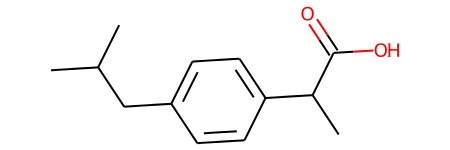

In [ ]:
display(ibu)

In [ ]:
bit_info = {}
fp = AllChem.GetMorganFingerprintAsBitVect(ibu, radius=2, bitInfo=bit_info)
bit_info

{1: ((1, 0), (10, 0)),
 79: ((3, 1),),
 80: ((3, 0),),
 283: ((0, 1), (2, 1), (11, 1)),
 310: ((5, 2), (9, 2)),
 389: ((14, 1),),
 650: ((13, 0),),
 807: ((12, 0), (14, 0)),
 854: ((1, 2),),
 857: ((4, 2),),
 900: ((10, 1),),
 921: ((12, 2),),
 955: ((3, 2),),
 1057: ((0, 0), (2, 0), (11, 0)),
 1146: ((7, 2),),
 1257: ((10, 2),),
 1365: ((7, 1),),
 1380: ((4, 0), (7, 0)),
 1750: ((5, 1), (6, 1), (8, 1), (9, 1)),
 1754: ((4, 1),),
 1844: ((12, 1),),
 1847: ((1, 1),),
 1853: ((6, 2), (8, 2)),
 1873: ((5, 0), (6, 0), (8, 0), (9, 0)),
 1917: ((13, 1),)}

**Интерпретация того, что выше, выглядит так:** 

* бит 1 встретился дважды: 
 * у атома 1 в радиусе 0; 
 * у атома 10 в радиусе 0.
* бит 79 встретился однажды:
 * у атома 3 в радиусе 1.
* и т.д.

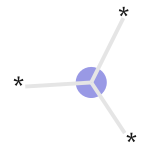

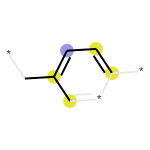

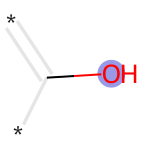

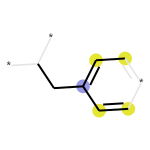

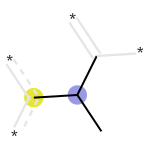

In [ ]:
display(Draw.DrawMorganBit(ibu, 1, bit_info, useSVG=True))
display(Draw.DrawMorganBit(ibu, 310, bit_info, useSVG=True))
display(Draw.DrawMorganBit(ibu, 389, bit_info, useSVG=True))
display(Draw.DrawMorganBit(ibu, 857, bit_info, useSVG=True))
display(Draw.DrawMorganBit(ibu, 900, bit_info, useSVG=True))

При помощи фингерпринтов можно сравнивать молекулы, исходя из *предположения*, что у похожих молекул похожие фингерпринты. 

In [ ]:
mol2 = Chem.MolFromSmiles('CC(C)CC1=CC=C(C=C1)C(C1=CN=NN1)(C)C(=O)O')
AllChem.Compute2DCoords(mol2)

0

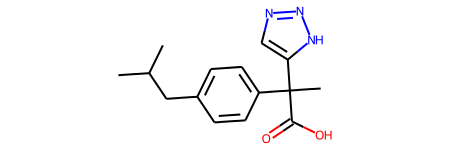

In [ ]:
display(mol2)

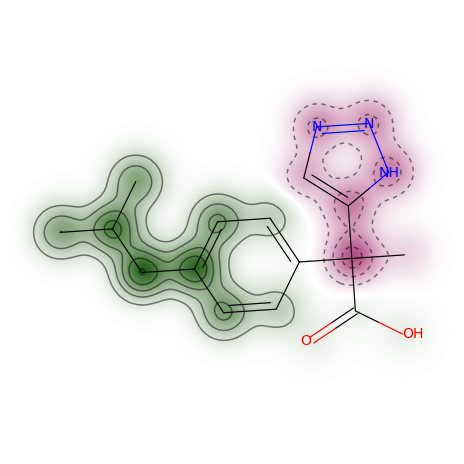

In [ ]:
similarity = SimilarityMaps.GetSimilarityMapForFingerprint(ibu, mol2, SimilarityMaps.GetMorganFingerprint)

Красненькое - непохожее, зелёное - похожее.

**Загрузим датасет.**

In [ ]:
import deepchem as dc
import numpy as np


tasks, datasets, transformers = dc.molnet.load_clintox(featurizer='ECFP', splitter="random")
train_dataset, valid_dataset, test_dataset = datasets

In [ ]:
train_dataset.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
train_dataset.y.reshape(1, -1)[0]

array([1., 0., 1., ..., 0., 1., 0.])

In [ ]:
train_X = np.concatenate([train_dataset.X, valid_dataset.X])
train_Y = np.concatenate([train_dataset.y, valid_dataset.y])

In [ ]:
train_X.shape, train_Y.shape

((1330, 1024), (1330, 2))

In [ ]:
train_Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
int(sum(train_Y[:, 1])), len(train_Y[:, 1])

(97, 1330)

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from umap import UMAP

sns.set_style("whitegrid")

In [ ]:
umap = UMAP(random_state=3)
X = umap.fit_transform(train_X)

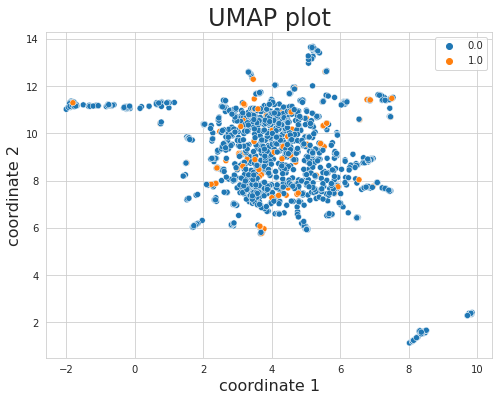

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('UMAP plot', size=24)
plt.xlabel('coordinate 1', size=16)
plt.ylabel('coordinate 2', size=16)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=train_Y[:, 1]);

In [ ]:
from sklearn.cluster import KMeans

**Скластеризуйте молекулы при помощи метода K-means, отрисуйте UMAP-проекцию с покраской по метке кластера.**

**Посчитайте F1-метрику по разметке, получившейся с помощью кластеризации.**

In [ ]:
from sklearn.metrics import f1_score

**Сделайте вывод, всегда ли кластеризация по схожести фингерпринтов коррелирует с биомедицинскими характеристиками вещества.**

## Филогенетическая реконструкция.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/clustering/phylorec.png" alt="Drawing" width= "700px;"/>

Среди всех методов реконструкции филогении можно выделить две группы: символьно-ориентированные методы и дистанционные методы. 
Первые принимают на вход выравнивание последовательностей, вторые - матрицу попарных расстояний между последовательностями. 

In [ ]:
!wget https://kodomo.fbb.msu.ru/FBB/year_20/ml/clustering/alignfam.fasta 

--2021-08-22 13:19:08--  https://kodomo.fbb.msu.ru/FBB/year_20/ml/clustering/alignfam.fasta
Resolving kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)... 93.180.63.127
Connecting to kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)|93.180.63.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26479 (26K)
Saving to: ‘alignfam.fasta’

alignfam.fasta      100%[===================>]  25.86K   155KB/s    in 0.2s    

2021-08-22 13:19:09 (155 KB/s) - ‘alignfam.fasta’ saved [26479/26479]



In [ ]:
!pip install biopython

     |████████████████████████████████| 2.3 MB 7.9 MB/s 


In [ ]:
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

In [ ]:
align = AlignIO.read('alignfam.fasta', 'fasta')

In [ ]:
print(align)

Alignment with 27 rows and 775 columns
--------------------------MST-------WWLVVVAA...FL- gi|544584820|sp|P29523.4|PPB_BOMMO
-------------------------MHCLV------ILGFLLGS...GL- gi|29427685|sp|Q24238.3|APH4_DROME
--------------------------MWGA---C--LLLLGLSL...EP- gi|341941722|sp|P24823.2|PPBN_MOUSE
--------------------------MQGD---WVLLLLLGLRI...VVS gi|130746|sp|P15693.1|PPBI1_RAT
--------------------------MQGP---WV-LLLLGLRL...AES gi|130745|sp|P24822.1|PPBI_MOUSE
--------------------------MQGA---WV-LLLLGFRL...R-- gi|1709730|sp|P51740.1|PPBI2_RAT
--------------------------MQGA---CV-LLLLGLHL...LY- gi|2507183|sp|P19111.2|PPBI_BOVIN
--------------------------MQGP---WV-LLLLGLRL...AP- gi|130744|sp|P09923.2|PPBI_HUMAN
--------------------------MLGP-CMLLLLLLLGLRL...AP- gi|130737|sp|P05187.2|PPB1_HUMAN
--------------------------MQGP---WV-LLLLGLRL...AP- gi|145559564|sp|P10696.4|PPBN_HUMAN
---------------------------MKA------FLLTLLAQ...--- gi|6093774|sp|Q92058.1|PPBT_CHICK
--------------------------

In [ ]:
calculator = DistanceCalculator('identity')
distMatrix = calculator.get_distance(align)
print(distMatrix)

gi|544584820|sp|P29523.4|PPB_BOMMO	0
gi|29427685|sp|Q24238.3|APH4_DROME	0.5290322580645161	0
gi|341941722|sp|P24823.2|PPBN_MOUSE	0.47096774193548385	0.4890322580645161	0
gi|130746|sp|P15693.1|PPBI1_RAT	0.47612903225806447	0.49290322580645163	0.18838709677419352	0
gi|130745|sp|P24822.1|PPBI_MOUSE	0.5058064516129033	0.5187096774193549	0.2154838709677419	0.17548387096774198	0
gi|1709730|sp|P51740.1|PPBI2_RAT	0.5045161290322581	0.5161290322580645	0.22709677419354835	0.1858064516129032	0.11483870967741938	0
gi|2507183|sp|P19111.2|PPBI_BOVIN	0.4567741935483871	0.49677419354838714	0.2141935483870968	0.2116129032258065	0.23354838709677417	0.2425806451612903	0
gi|130744|sp|P09923.2|PPBI_HUMAN	0.447741935483871	0.49935483870967745	0.16258064516129034	0.16645161290322585	0.19483870967741934	0.20516129032258068	0.16387096774193544	0
gi|130737|sp|P05187.2|PPB1_HUMAN	0.4541935483870968	0.49935483870967745	0.1780645161290323	0.19612903225806455	0.22193548387096773	0.23612903225806448	0.19354838709677

In [ ]:
constructor = DistanceTreeConstructor()
UPGMA_tree = constructor.upgma(distMatrix)

In [ ]:
UPGMA_tree.ladderize()
Phylo.draw_ascii(UPGMA_tree)

            ____________________ gi|2851586|sp|P11491.2|PPB_YEAST
        ___|
       |   |____________________ gi|21542183|sp|O60109.1|PPB_SCHPO
       |
  _____|                    ___________ gi|251757504|sp|P19405.4|PPB3_BACSU
 |     |         __________|
 |     |        |          |___________ gi|239938928|sp|P19406.4|PPB4_BACSU
 |     |________|
 |              |       _______________ gi|134996|sp|P09401.2|STRK_STRGR
 |              |      |
 |              |______|               , gi|122260447|sp|Q02QC9.1|PPBH_PSEAB
 |                     |         ______|
 |                     |        |      | gi|12231022|sp|P35483.2|PPBH_PSEAE
 |                     |________|
_|                              | ______ gi|130754|sp|P19147.1|PPB_SERMA
 |                              ||
 |                               |    __ gi|130753|sp|P21948.1|PPB_ESCF3
 |                               |___|
 |                                   |__ gi|130752|sp|P00634.1|PPB_ECOLI
 |
 |      ________________

**Повторите то же самое с подсчётом матрицы расстояний с моделью 'blosum62'.**